In [112]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# Features

In [2]:
# importing features and target with pandas library

data_uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(data_uri)

In [3]:
#shows frist 5 instances from data
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
# mapping columns to rename, text in portuguese-brazilian
map = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

data = data.rename(columns = map)

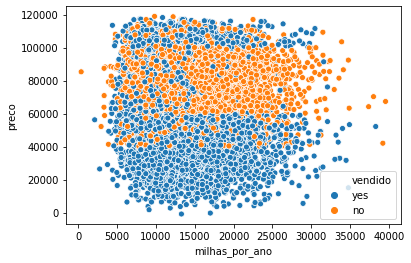

In [5]:
sns.scatterplot(x = 'milhas_por_ano', y = 'preco', data = data, hue='vendido')

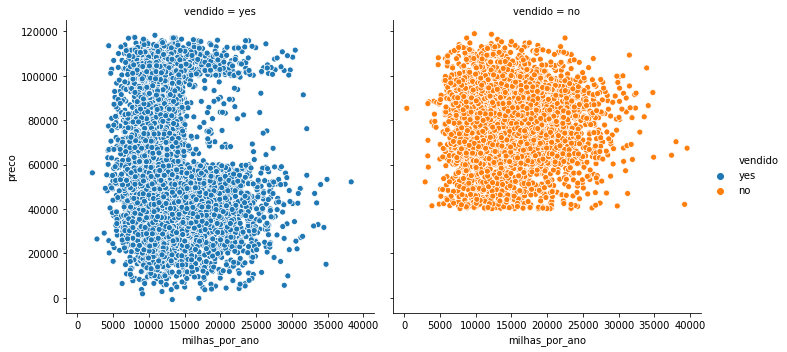

In [6]:
sns.relplot(x = 'milhas_por_ano', y = 'preco', data = data, col='vendido', hue='vendido')

In [7]:
vendido = {
    'yes' : 1,
    'no' : 0
}

data.vendido = data.vendido.map(vendido)

In [17]:
import datetime
now = datetime.datetime.now()
data['idade_carro'] = now.year - data.ano_modelo

In [23]:
data['km_ano'] = data.milhas_por_ano * 1.60934

In [24]:
data.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_carro,km_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


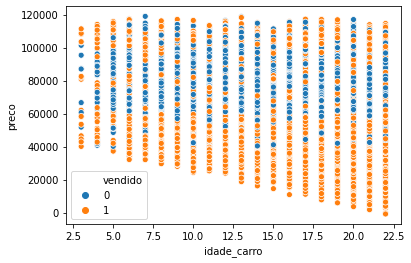

In [19]:
sns.scatterplot(x = 'idade_carro', y = 'preco', data = data, hue='vendido')

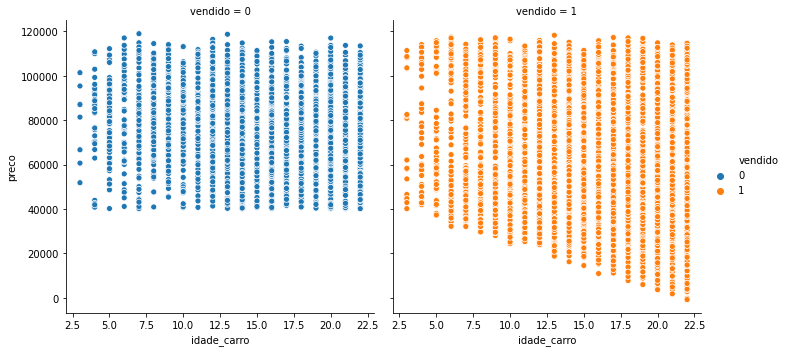

In [20]:
sns.relplot(x = 'idade_carro', y = 'preco', data = data, col='vendido', hue='vendido')

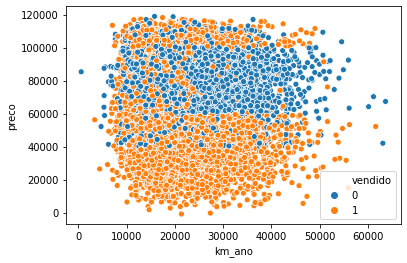

In [25]:
sns.scatterplot(x = 'km_ano', y = 'preco', data = data, hue='vendido')

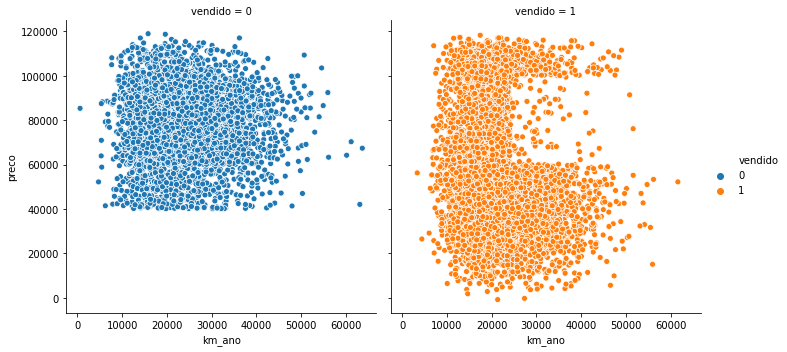

In [26]:
sns.relplot(x = 'km_ano', y = 'preco', data = data, col='vendido', hue='vendido')

In [28]:
data = data.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_modelo'], axis=1)

In [29]:
data.head()

,preco,vendido,idade_carro,km_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [30]:
# split features from target
x = data[['idade_carro', 'km_ano', 'preco']]
y = data['vendido']

In [31]:
# size of data, in this example, has 99 instances and 4 features
data.shape

(10000, 4)

# Treino do estimador

## LinearSVC

In [49]:
SEED = 5
#The sklearn uses the default random_state from numpy.random, to preserve the replicability we will set the random state for numpy too.
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, 
                                    stratify = y) # on separation mantains the proportion of dataset
model = LinearSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

taxa_acerto = accuracy_score(test_y, previsoes)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(train_y)))
print("Accuracy: %.2f%%" % (taxa_acerto * 100))

Treinaremos com 7500 elementos e testaremos com 7500 elementos
Accuracy: 58.00%


/home/tacito/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Baseline com Dummy Classifier

In [86]:
from sklearn.dummy import DummyClassifier

SEED = 5
#The sklearn uses the default random_state from numpy.random, to preserve the replicability we will set the random state for numpy too.
np.random.seed(SEED)

dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(train_x, train_y)
previsoes = dummy.predict(test_x)

taxa_acerto = accuracy_score(test_y, previsoes)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(train_y)))
print("Accuracy: %.2f%%" % (dummy.score(test_x, test_y) * 100)) 

Treinaremos com 7500 elementos e testaremos com 7500 elementos
Accuracy: 49.84%


# NuSVC

In [40]:
SEED = 5
#The sklearn uses the default random_state from numpy.random, to preserve the replicability we will set the random state for numpy too.
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, 
                                    stratify = y) # on separation mantains the proportion of dataset
model = NuSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

taxa_acerto = accuracy_score(test_y, previsoes)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(train_y)))
print("Accuracy: %.2f%%" % (taxa_acerto * 100))

Treinaremos com 7500 elementos e testaremos com 7500 elementos
Accuracy: 41.04%


# SVC

In [90]:
SEED = 5
# The sklearn SVC uses the default random_state from numpy.random, 
# to preserve the replicability we will set the random state for 
# numpy too.
np.random.seed(SEED)

raw_train_x, raw_test_x, raw_train_y, raw_test_y = train_test_split(x, y, test_size = 0.25, 
                                    stratify = y) # on separation 
                               # mantains the proportion of dataset

# For SVC, we need to correct the scale of data, for this, 
# we will use StandardScaler 

# The scaler will get by the mean and divide the standard deviation
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

taxa_acerto = accuracy_score(test_y, previsoes)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(train_y)))
print("Accuracy: %.2f%%" % (taxa_acerto * 100))

Treinaremos com 7500 elementos e testaremos com 7500 elementos
Accuracy: 77.48%


# Decision Tree Classifier

In [158]:
SEED = 5
# The sklearn uses the default random_state from numpy.random, 
# to preserve the replicability we will set the random state for 
# numpy too.
np.random.seed(SEED)

raw_train_x, raw_test_x, raw_train_y, raw_test_y = train_test_split(x, y, test_size = 0.25, 
                                    stratify = y) # on separation 
                               # mantains the proportion of dataset

model = DecisionTreeClassifier(max_depth=5)
model.fit(raw_train_x, raw_train_y)
previsoes = model.predict(raw_test_x)

taxa_acerto = accuracy_score(test_y, previsoes)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(train_y)))
print("Accuracy: %.2f%%" % (taxa_acerto * 100))

Treinaremos com 7500 elementos e testaremos com 7500 elementos
Accuracy: 79.32%


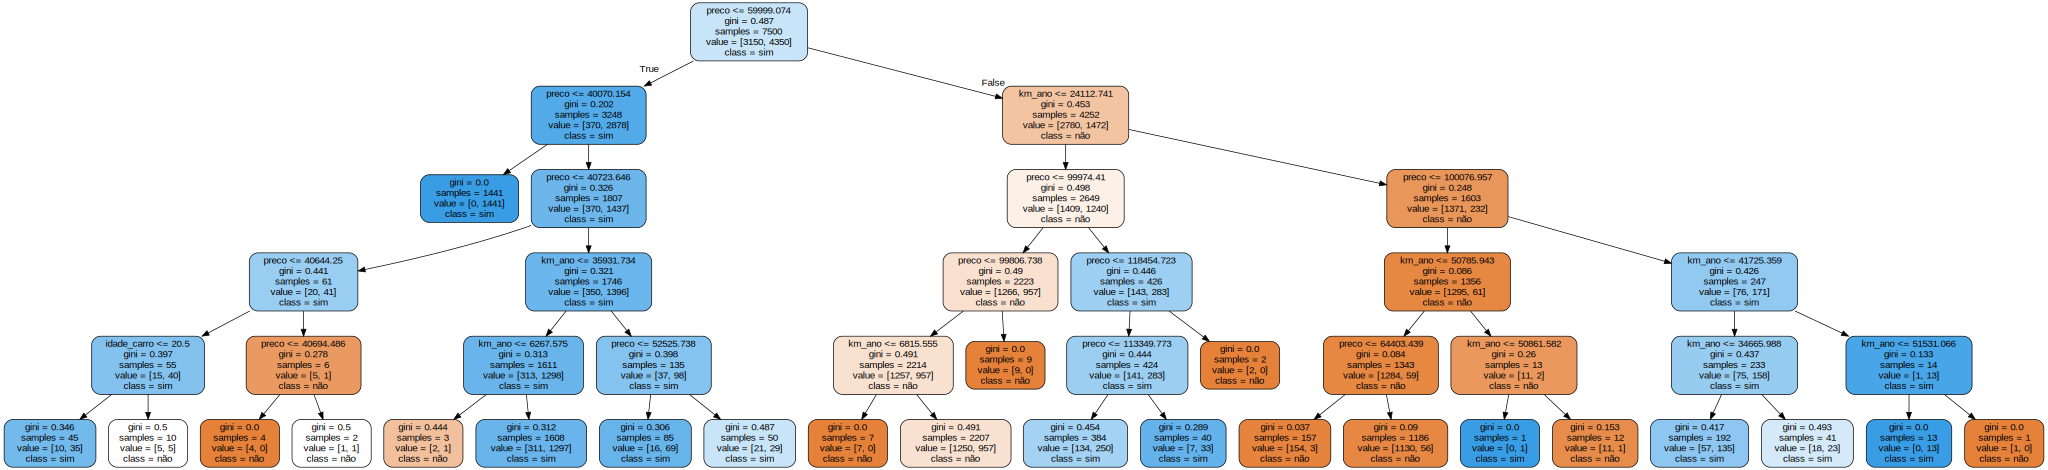

In [159]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None, # '5_decision_tree.png'
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

# Avaliação da Decisão - Decision Boundary

ValueError: 'c' argument has 10000 elements, which is inconsistent with 'x' and 'y' with size 7500.

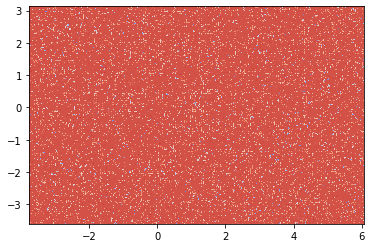

In [110]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def decision_boundary(clf):
    fig, ax = plt.subplots()
    title = ('Decision Boundary')
    
    X0, X1 = train_x[:,1], train_x[:,2]
    xx, yy = make_meshgrid(X0, X1)
    
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y label here')
    ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

decision_boundary(dummy)

# Otimização